In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd

df = pd.read_csv("../data/raw_windowed.csv")

ibov = df[df['type'] == 'ibov'].dropna()
ibov['log_return'] = np.log10(ibov['return'])
cdi = df[df['type'] == 'cdi'].dropna()
cdi['log_return'] = np.log10(cdi['return'])

In [2]:
diff_records = []
period = 30

for window_size in ibov.window_size.unique():
    ibov_tax = 1 - 0.15
    
    if window_size <= 180:
        cdi_tax = 1 - 0.225
    elif window_size <= 360:
        cdi_tax = 1 - 0.2
    elif window_size <= 720:
        cdi_tax = 1 - 0.175
    else:
        cdi_tax = 1 - 0.15
        
    #     windowed_ibov = \
    #         np.exp((period / window_size) 
    #                * np.log(ibov[ibov['window_size'] == window_size]['return']))

    windowed_ibov = ibov[ibov['window_size'] == window_size]['return']
    
    ibov_return_mean = np.mean(windowed_ibov)
    ibov_return_std = np.std(windowed_ibov)
    
    ibov_quantiles = {
        f'ibov_{q}': np.percentile(windowed_ibov, q) 
        for q in range(0, 101)}
    
    ibov_taxed_list = [
        ((x - 1) * ibov_tax + 1) if x > 1 else x 
        for x in windowed_ibov]
    
    ibov_taxed_return_mean = np.mean(ibov_taxed_list)
    ibov_taxed_return_std = np.std(ibov_taxed_list)
    
    ibov_taxed_quantiles = {
        f'ibov_taxed_{q}': np.percentile(ibov_taxed_list, q) 
        for q in range(0, 101)}
    
    
    #     windowed_cdi = \
    #         np.exp((period / window_size) 
    #                * np.log(cdi[cdi['window_size'] == window_size]['return']))

    windowed_cdi = cdi[cdi['window_size'] == window_size]['return']
    
    cdi_return_mean = np.mean(windowed_cdi)
    cdi_return_std = np.std(windowed_cdi)
    
    cdi_quantiles = {
        f'cdi_{q}': np.percentile(windowed_cdi, q) 
        for q in range(0, 101)}
    
    cdi_taxed_list = [
        ((x - 1) * cdi_tax + 1) if x > 1 else x 
        for x in windowed_cdi]
    
    cdi_taxed_return_mean = np.mean(cdi_taxed_list)
    cdi_taxed_return_std = np.std(cdi_taxed_list)
    quartile
    cdi_taxed_quantiles = {
        f'cdi_taxed_{q}': np.percentile(cdi_taxed_list, q) 
        for q in range(0, 101)}
    
    
    diff_records.append({
        'window_size': window_size, 
        'ibov_return_mean': ibov_return_mean,
        'ibov_return_std': ibov_return_std,
        'ibov_taxed_return_mean': ibov_taxed_return_mean,
        'ibov_taxed_return_std': ibov_taxed_return_std,
        'cdi_return_mean': cdi_return_mean,
        'cdi_return_std': cdi_return_std,
        'cdi_taxed_return_mean': cdi_taxed_return_mean,
        'cdi_taxed_return_std': cdi_taxed_return_std,
        **ibov_quantiles,
        **ibov_taxed_quantiles,
        **cdi_quantiles,
        **cdi_taxed_quantiles,
    })
    
windowed_stats = pd.DataFrame(diff_records)

In [3]:
from colour import Color
red = Color("red")
colors = list(red.range_to(Color("green"),101))

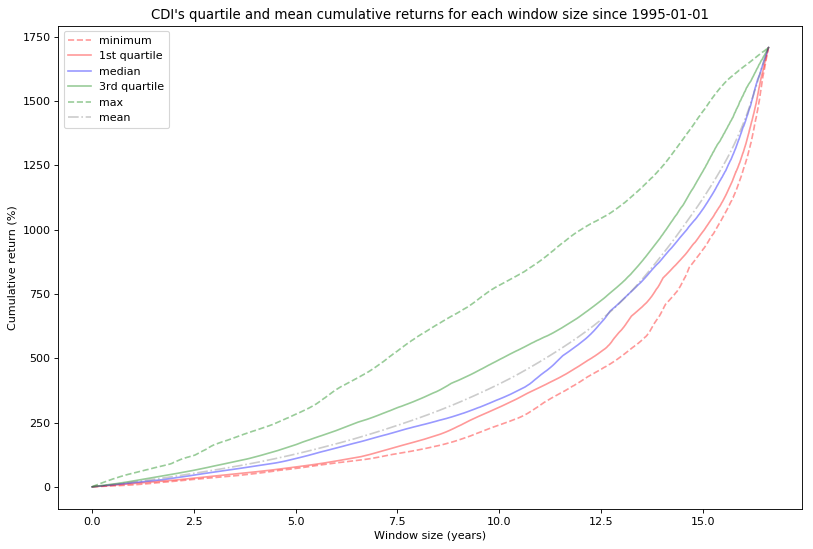

In [33]:
figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

plt.plot(
        windowed_stats['window_size'] / 365, 
        (windowed_stats['cdi_0'] - 1) * 100, '--',
        color='red', alpha=0.4,
        label="minimum")

plt.plot(
        windowed_stats['window_size'] / 365, 
        (windowed_stats['cdi_25'] - 1) * 100, 
        color='red', alpha=0.4,
        label="1st quartile")

plt.plot(
        windowed_stats['window_size'] / 365, 
        (windowed_stats['cdi_50'] - 1) * 100, 
        color='blue', alpha=0.4,
        label="median")

plt.plot(
        windowed_stats['window_size'] / 365, 
        (windowed_stats['cdi_75'] - 1) * 100, 
        color='green', alpha=0.4,
        label="3rd quartile")

plt.plot(
        windowed_stats['window_size'] / 365, 
        (windowed_stats['cdi_100'] - 1) * 100, '--',
        color='green', alpha=0.4,
        label="max")

plt.plot(
        windowed_stats['window_size'] / 365, 
        (windowed_stats['cdi_return_mean'] - 1) * 100, '-.', 
        color='gray', alpha=0.4,
        label="mean")

plt.title('CDI\'s quartile and mean cumulative returns for each window size since 1995-01-01')
plt.xlabel('Window size (years)')
plt.ylabel('Cumulative return (%)')
plt.legend()
plt.show()

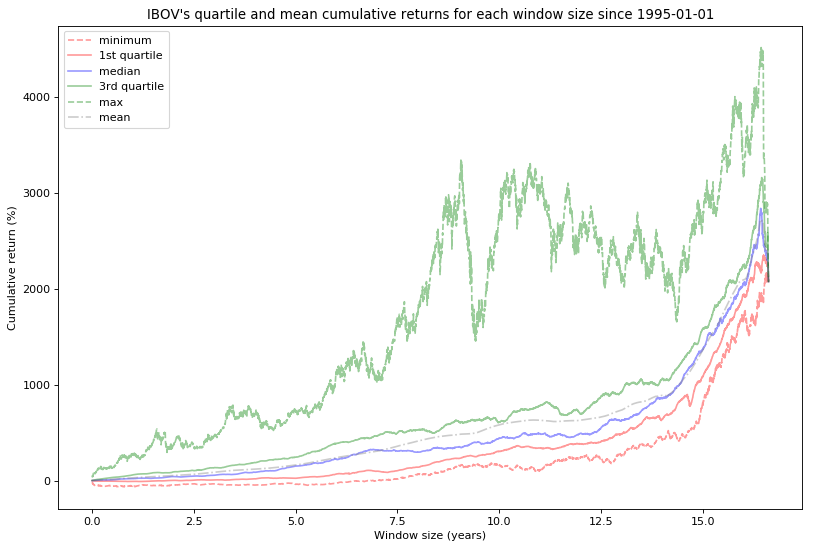

In [34]:
figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

plt.plot(
        windowed_stats['window_size'] / 365, 
        (windowed_stats['ibov_0'] - 1) * 100, '--',
        color='red', alpha=0.4,
        label="minimum")

plt.plot(
        windowed_stats['window_size'] / 365, 
        (windowed_stats['ibov_25'] - 1) * 100, 
        color='red', alpha=0.4,
        label="1st quartile")

plt.plot(
        windowed_stats['window_size'] / 365, 
        (windowed_stats['ibov_50'] - 1) * 100, 
        color='blue', alpha=0.4,
        label="median")

plt.plot(
        windowed_stats['window_size'] / 365, 
        (windowed_stats['ibov_75'] - 1) * 100, 
        color='green', alpha=0.4,
        label="3rd quartile")

plt.plot(
        windowed_stats['window_size'] / 365, 
        (windowed_stats['ibov_100'] - 1) * 100, '--',
        color='green', alpha=0.4,
        label="max")

plt.plot(
        windowed_stats['window_size'] / 365, 
        (windowed_stats['ibov_return_mean'] - 1) * 100, '-.', 
        color='gray', alpha=0.4,
        label="mean")

plt.title('IBOV\'s quartile and mean cumulative returns for each window size since 1995-01-01')
plt.xlabel('Window size (years)')
plt.ylabel('Cumulative return (%)')
plt.legend()
plt.show()

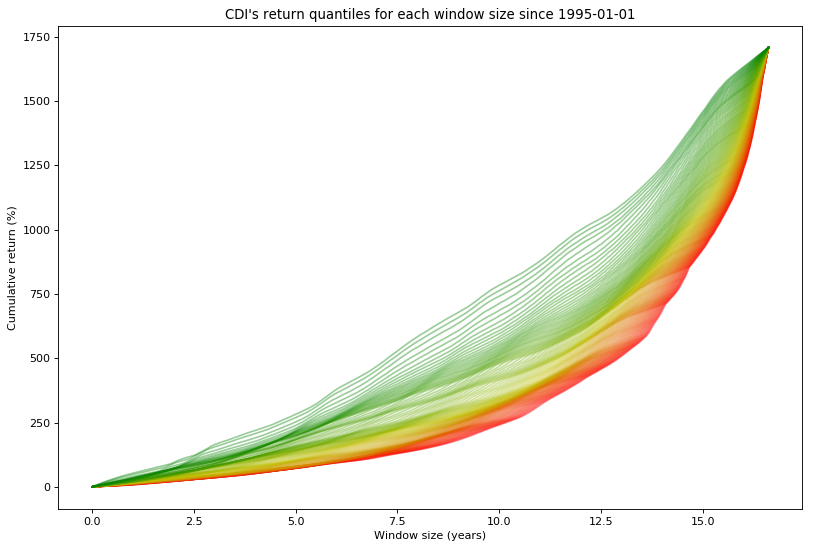

In [35]:
figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

for q in range(0, 101):
    plt.plot(
        windowed_stats['window_size'] / 365, 
        (windowed_stats[f'cdi_{q}'] - 1) * 100, 
        color=colors[q].rgb, alpha=0.4)

plt.title('CDI\'s return quantiles for each window size since 1995-01-01')
plt.xlabel('Window size (years)')
plt.ylabel('Cumulative return (%)')
plt.show()

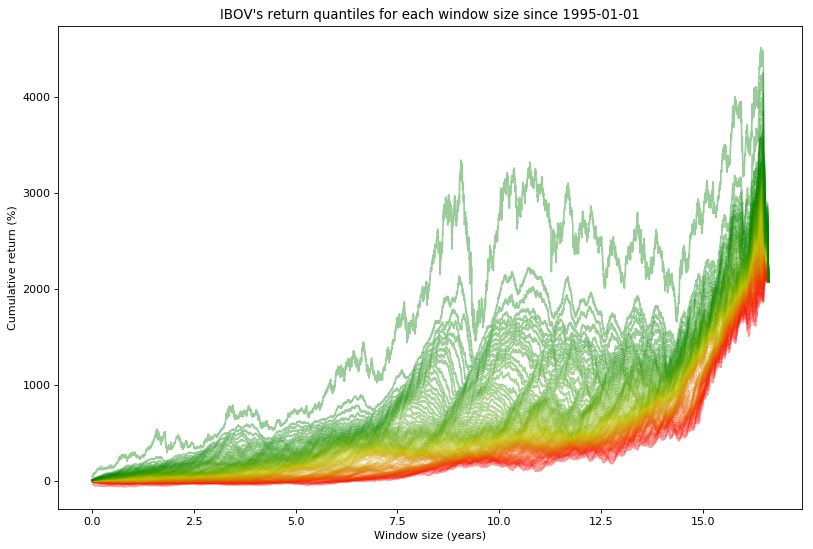

In [36]:
figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

for q in range(0, 101):
    plt.plot(
        windowed_stats['window_size'] / 365, 
        (windowed_stats[f'ibov_{q}'] - 1) * 100, 
        color=colors[q].rgb, alpha=0.4)

plt.title('IBOV\'s figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

for q in range(0, 101):
    plt.plot(
        windowed_stats['window_size'] / 365, 
        (windowed_stats[f'ibov_{q}'] - 1) * 100, 
        color=colors[q].rgb, alpha=0.4)

plt.title('IBOV\'s return quantiles for each window size since 1995-01-01')
plt.xlabel('Window size (years)')
plt.ylabel('Cumulative return (%)')
plt.show()return quantiles for each window size since 1995-01-01')
plt.xlabel('Window size (years)')
plt.ylabel('Cumulative return (%)')
plt.show()

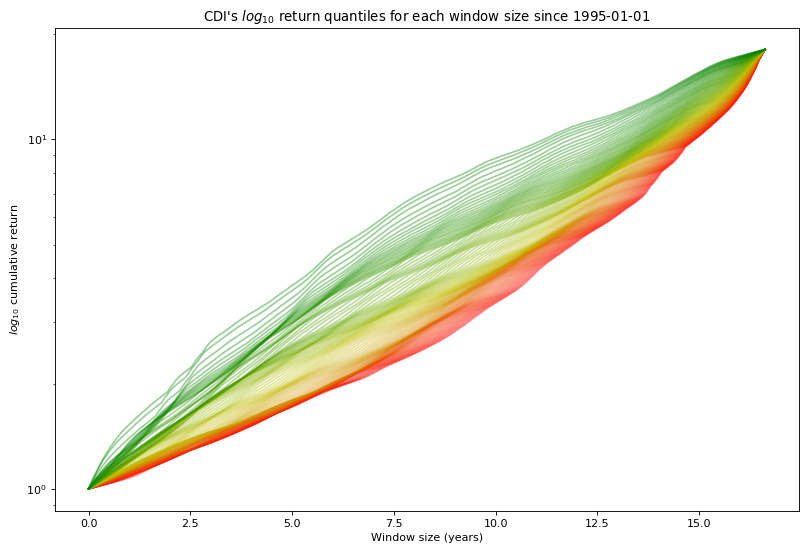

In [37]:
figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

for q in range(0, 101):
    plt.semilogy(
        windowed_stats['window_size'] / 365, 
        windowed_stats[f'cdi_{q}'], 
        color=colors[q].rgb, alpha=0.4)

plt.title('CDI\'s $log_{10}$ return quantiles for each window size since 1995-01-01')
plt.xlabel('Window size (years)')
plt.ylabel('$log_{10}$ cumulative return')
plt.show()

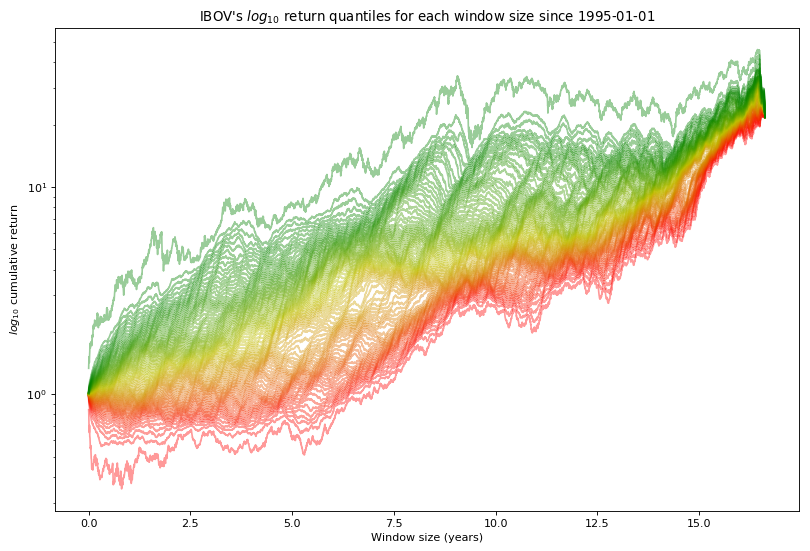

In [40]:
figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

for q in range(0, 101):
    plt.semilogy(
        windowed_stats['window_size'] / 365, 
        windowed_stats[f'ibov_{q}'], 
        color=colors[q].rgb, alpha=0.4)

plt.title('IBOV\'s $log_{10}$ return quantiles for each window size since 1995-01-01')
plt.xlabel('Window size (years)')
plt.ylabel('$log_{10}$ cumulative return')
plt.show()

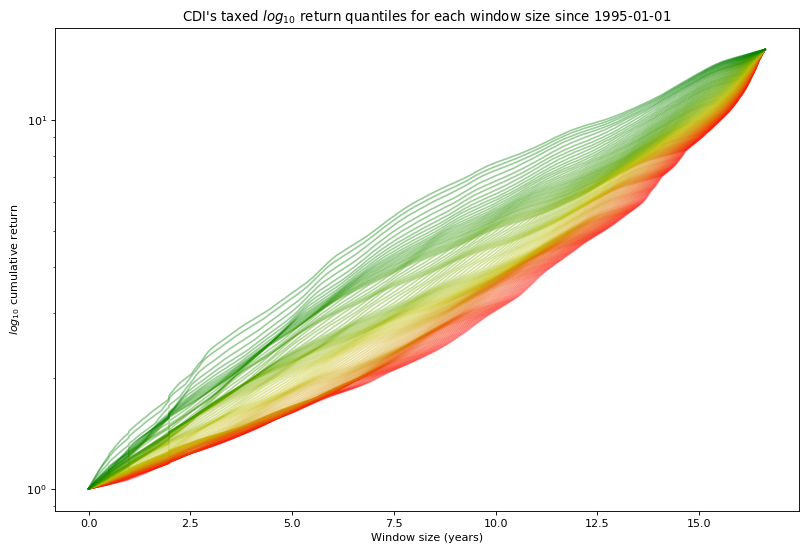

In [70]:
figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

for q in range(0, 101):
    plt.semilogy(
        windowed_stats['window_size'] / 365, 
        windowed_stats[f'cdi_taxed_{q}'], 
        color=colors[q].rgb, alpha=0.4)

plt.title('CDI\'s taxed $log_{10}$ return quantiles for each window size since 1995-01-01')
plt.xlabel('Window size (years)')
plt.ylabel('$log_{10}$ cumulative return')
plt.show()

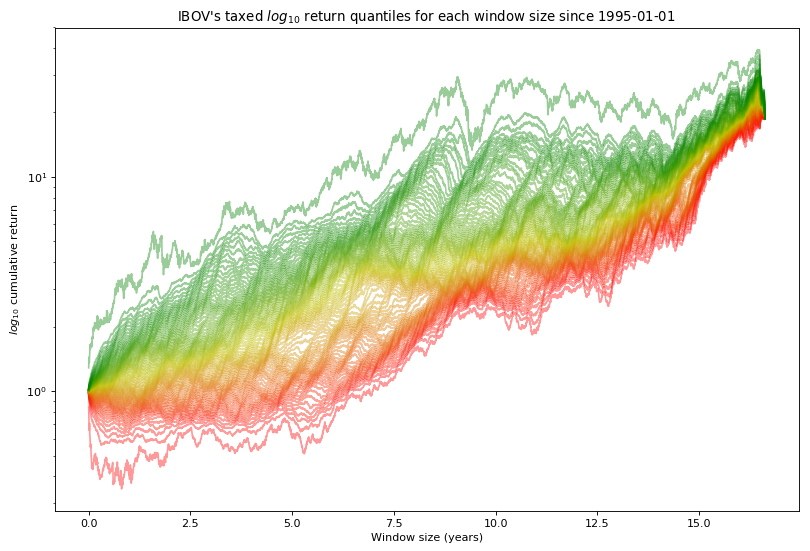

In [71]:
figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

for q in range(0, 101):
    plt.semilogy(
        windowed_stats['window_size'] / 365, 
        windowed_stats[f'ibov_taxed_{q}'], 
        color=colors[q].rgb, alpha=0.4)

plt.title('IBOV\'s taxed $log_{10}$ return quantiles for each window size since 1995-01-01')
plt.xlabel('Window size (years)')
plt.ylabel('$log_{10}$ cumulative return')
plt.show()

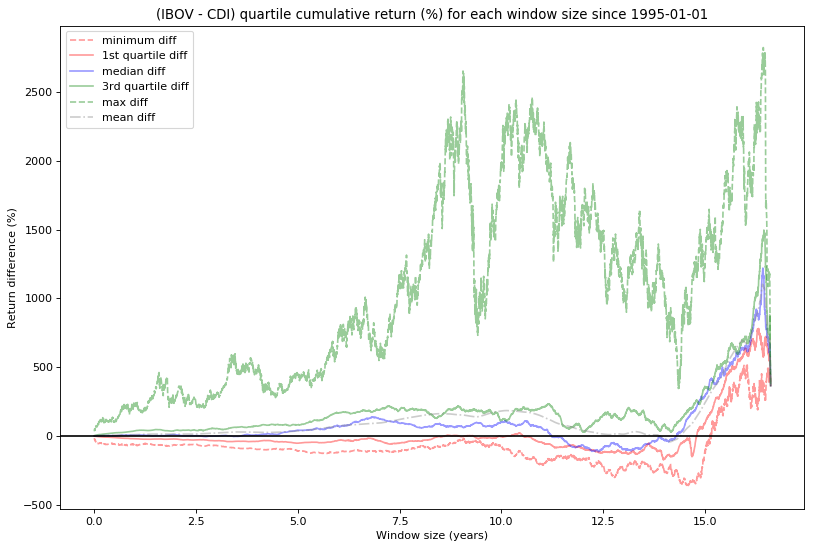

In [63]:
figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

plt.plot(
        windowed_stats['window_size'] / 365, 
        (windowed_stats['ibov_0'] - windowed_stats['cdi_0']) * 100, '--',
        color='red', alpha=0.4,
        label="minimum diff")

plt.plot(
        windowed_stats['window_size'] / 365, 
        (windowed_stats['ibov_25'] - windowed_stats['cdi_25']) * 100,
        color='red', alpha=0.4,
        label="1st quartile diff")

plt.plot(
        windowed_stats['window_size'] / 365, 
        (windowed_stats['ibov_50'] - windowed_stats['cdi_50']) * 100,
        color='blue', alpha=0.4,
        label="median diff")

plt.plot(
        windowed_stats['window_size'] / 365, 
        (windowed_stats['ibov_75'] - windowed_stats['cdi_75']) * 100, 
        color='green', alpha=0.4,
        label="3rd quartile diff")

plt.plot(
        windowed_stats['window_size'] / 365, 
        (windowed_stats['ibov_100'] - windowed_stats['cdi_100']) * 100, '--',
        color='green', alpha=0.4,
        label="max diff")

plt.plot(
        windowed_stats['window_size'] / 365, 
        (windowed_stats['ibov_return_mean'] - windowed_stats['cdi_return_mean']) * 100, '-.', 
        color='gray', alpha=0.4,
        label="mean diff")

plt.title('(IBOV - CDI) quartile cumulative return (%) for each window size since 1995-01-01')
plt.xlabel('Window size (years)')
plt.ylabel('Quartile cumulative return difference (%)')
plt.legend()
plt.axhline(y=0, color='black')
plt.show()

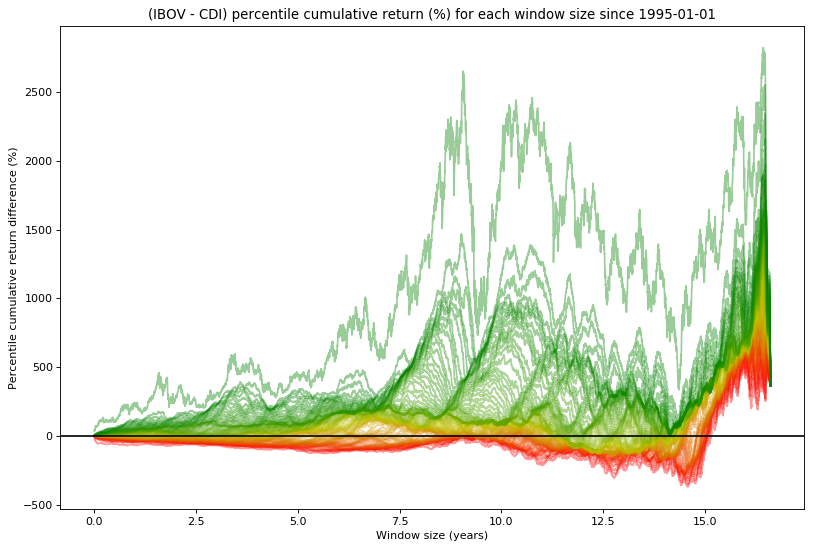

In [67]:
figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

for q in range(0, 101):
    plt.plot(
        windowed_stats['window_size'] / 365, 
        (windowed_stats[f'ibov_{q}'] - windowed_stats[f'cdi_{q}']) * 100, 
        color=colors[q].rgb, alpha=0.4)

plt.title('(IBOV - CDI) percentile cumulative return (%) for each window size since 1995-01-01')
plt.xlabel('Window size (years)')
plt.ylabel('Percentile cumulative return difference (%)')
plt.axhline(y=0, color='black')
plt.show()

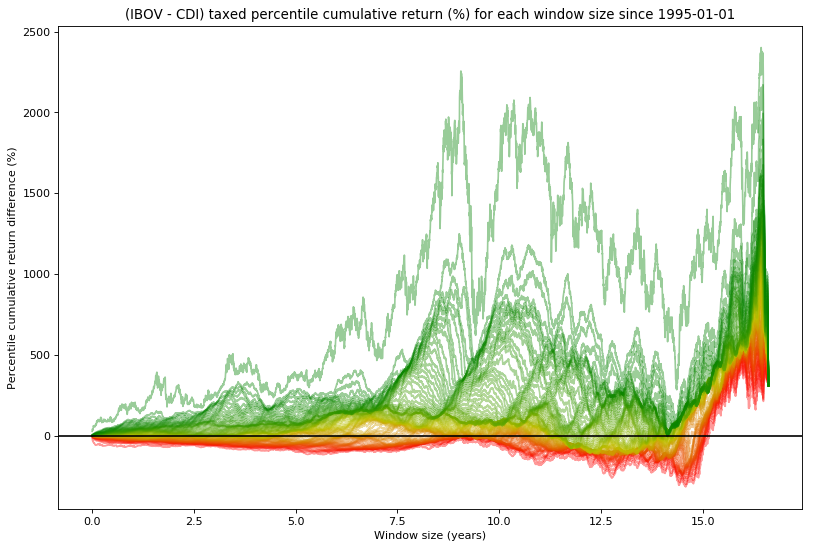

In [73]:
figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

for q in range(0, 101):
    plt.plot(
        windowed_stats['window_size'] / 365, 
        (windowed_stats[f'ibov_taxed_{q}'] - windowed_stats[f'cdi_taxed_{q}']) * 100, 
        color=colors[q].rgb, alpha=0.4)

plt.title('(IBOV - CDI) taxed percentile cumulative return (%) for each window size since 1995-01-01')
plt.xlabel('Window size (years)')
plt.ylabel('Percentile cumulative return difference (%)')
plt.axhline(y=0, color='black')
plt.show()

In [78]:
indifferent_quantiles = {}
indifferent_quantiles_taxed = {}

for _, cols in windowed_stats.iterrows():
    window_size = cols['window_size']
    quantile = 0
    min_diff = 999999999999999999
    quantile_taxed = 0
    min_diff_taxed = 999999999999999999
    for q in range(0, 101):
        diff = abs(cols[f'ibov_{q}'] - cols[f'cdi_{q}'])
        diff_taxed = abs(cols[f'ibov_taxed_{q}'] - cols[f'cdi_taxed_{q}'])
        if diff < min_diff:
            quantile = q
            min_diff = diff
            
        if diff_taxed < min_diff_taxed:
            quantile_taxed = q
            min_diff_taxed = diff_taxed
            
    indifferent_quantiles[window_size] = quantile
    indifferent_quantiles_taxed[window_size] = quantile_taxed

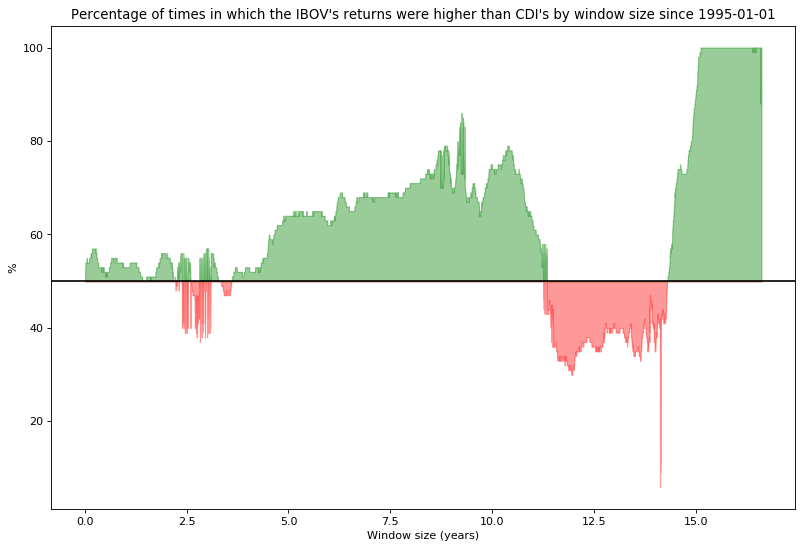

In [99]:
figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

y = [100 - indifferent_quantiles[q] for q in range(1, len(windowed_stats['window_size']) + 1)]

y_pos = [i if i > 50 else 50 for i in y]
y_neg = [i if i < 50 else 50 for i in y]

plt.fill_between(
    windowed_stats['window_size'] / 365, y_pos, 50,
    color='green', alpha=0.4)

plt.fill_between(
    windowed_stats['window_size'] / 365, y_neg, 50,
    color='red', alpha=0.4)

plt.title('Percentage of times in which the IBOV\'s returns were higher than CDI\'s by window size since 1995-01-01')
plt.xlabel('Window size (years)')
plt.axhline(y=50, color='black')
plt.ylabel('%')
plt.show()

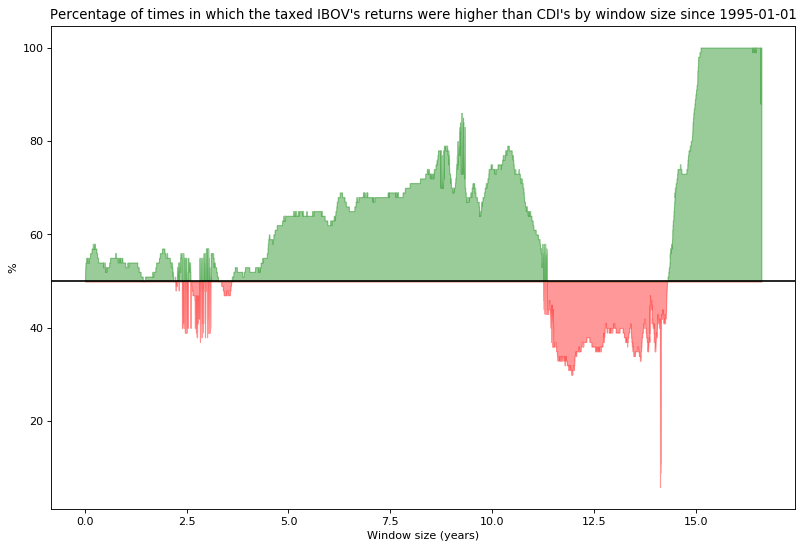

In [100]:
figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

y = [100 - indifferent_quantiles_taxed[q] for q in range(1, len(windowed_stats['window_size']) + 1)]

y_pos = [i if i > 50 else 50 for i in y]
y_neg = [i if i < 50 else 50 for i in y]

plt.fill_between(
    windowed_stats['window_size'] / 365, y_pos, 50,
    color='green', alpha=0.4)

plt.fill_between(
    windowed_stats['window_size'] / 365, y_neg, 50,
    color='red', alpha=0.4)

plt.title('Percentage of times in which the taxed IBOV\'s returns were higher than CDI\'s by window size since 1995-01-01')
plt.xlabel('Window size (years)')
plt.axhline(y=50, color='black')
plt.ylabel('%')
plt.show()

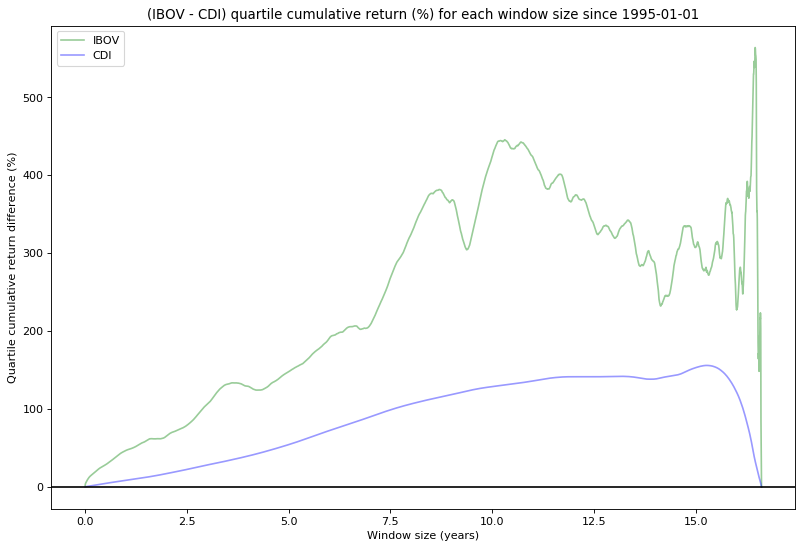

In [103]:
figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

plt.plot(
        windowed_stats['window_size'] / 365, 
        windowed_stats['ibov_return_std'] * 100,
        color='green', alpha=0.4,
        label="IBOV")

plt.plot(
        windowed_stats['window_size'] / 365, 
        windowed_stats['cdi_return_std'] * 100,
        color='blue', alpha=0.4,
        label="CDI")


plt.title('(IBOV - CDI) quartile cumulative return (%) for each window size since 1995-01-01')
plt.xlabel('Window size (years)')
plt.ylabel('Quartile cumulative return difference (%)')
plt.legend()
plt.axhline(y=0, color='black')
plt.show()

In [105]:
negative = {key: value < 50 for key, value in indifferent_quantiles.items()}
print(negative)

{1.0: True, 2.0: True, 3.0: True, 4.0: True, 5.0: True, 6.0: True, 7.0: True, 8.0: True, 9.0: True, 10.0: True, 11.0: True, 12.0: True, 13.0: True, 14.0: True, 15.0: True, 16.0: True, 17.0: True, 18.0: True, 19.0: True, 20.0: True, 21.0: True, 22.0: True, 23.0: True, 24.0: True, 25.0: True, 26.0: True, 27.0: True, 28.0: True, 29.0: True, 30.0: True, 31.0: True, 32.0: True, 33.0: True, 34.0: True, 35.0: True, 36.0: True, 37.0: True, 38.0: True, 39.0: True, 40.0: True, 41.0: True, 42.0: True, 43.0: True, 44.0: True, 45.0: True, 46.0: True, 47.0: True, 48.0: True, 49.0: True, 50.0: True, 51.0: True, 52.0: True, 53.0: True, 54.0: True, 55.0: True, 56.0: True, 57.0: True, 58.0: True, 59.0: True, 60.0: True, 61.0: True, 62.0: True, 63.0: True, 64.0: True, 65.0: True, 66.0: True, 67.0: True, 68.0: True, 69.0: True, 70.0: True, 71.0: True, 72.0: True, 73.0: True, 74.0: True, 75.0: True, 76.0: True, 77.0: True, 78.0: True, 79.0: True, 80.0: True, 81.0: True, 82.0: True, 83.0: True, 84.0: True, 

In [106]:
5223 / 365

14.30958904109589

In [107]:
4108 / 365

11.254794520547945